#📌 Extracción

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

url = 'https://raw.githubusercontent.com/JDVAR7/Challenge-2---TelecomX-DSLatam/refs/heads/main/TelecomX_Data.jason'

#🔧 Transformación

In [34]:
df = pd.read_json(url)
csv_file = 'TelecomX_Data.csv'
df.to_csv(csv_file, index=False)
df = pd.read_csv(csv_file, sep=',')
df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [120]:
import ast

# Realizo una copia del listado para no ocacionar inconvenientes si llego a necesitar el informe original
df_1 = df.copy()

# Lista de columnas que contienen diccionarios anidados (which are currently string representations)
datos_anidados = ['customer', 'phone', 'internet', 'account']

# busco las representaciones de los diccionarios
for col in datos_anidados:
    if col in df_1.columns:
        # Apply literal_eval only if the value is a non-empty string and not already a dict
        df_1[col] = df_1[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and len(x.strip()) > 0 else x)

# despejo las columnas
for a in datos_anidados:
    if a in df_1.columns:
        # Verificar si la columna contiene diccionarios a despejar
        first_non_null = df_1[a].dropna().iloc[0] if not df_1[a].dropna().empty else None

        if isinstance(first_non_null, dict):
            a_data = pd.json_normalize(df_1[a])
            a_data.columns = [f"{a}_{sub_a}" for sub_a in a_data.columns]
            df_1 = pd.concat([df_1, a_data], axis=1)
            df_1 = df_1.drop(columns=[a])
        else:
            print(f"Advertencia: La columna '{a}' no parece contener diccionarios después de la conversión. Se omite despeje.")
    else:
        print(f"Advertencia: No se encontró la columna '{a}' en el DataFrame para el despeje. Se omite.")

# se despliega la nueva tabla informativa
display(df_1.head(10))

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [36]:
df_1.shape
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [121]:
# Se definen los prefijos a eliminar
prefixes = ['customer_', 'phone_', 'internet_', 'account_']

# Se crea un diccionario donde iran las nuevas columnas
new_columns = {}

# Se iteran las columnas existentes con los nombres dispuestos para su identificación
for col in df_1.columns:
    new_name = col
    for prefix in prefixes:
        if col.startswith(prefix):
            new_name = col.replace(prefix, '')
            break # Solo se reeplazan los prefijos identificados
    new_columns[col] = new_name

# columnas renombradas de df_1
df_1 = df_1.rename(columns=new_columns)

print("Columnas y sus nuevos nombres:")
print(df_1.columns.tolist())

Columnas y sus nuevos nombres:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [128]:
# Lista de columnas a borrar
drop_columns = ['Partner','Dependents','PaperlessBilling', 'PaymentMethod','MultipleLines', 'InternetService', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filtrar columanas que no existan para evitar inconvenientes
columns_drop = [c for c in drop_columns if c in df_1.columns] # Corrected 'col' to 'c'

if columns_drop:
    df_1 = df_1.drop(columns=columns_drop)
    print(f"borrado exitoso de las {len(columns_drop)} columnas.")
else:
    print("No se encontraron columnas especificas que borrar en el dataframe.")

df_1.info()

No se encontraron columnas especificas que borrar en el dataframe.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7267 non-null   object 
 1   Churn                   7043 non-null   object 
 2   gender                  7267 non-null   object 
 3   SeniorCitizen           7267 non-null   int64  
 4   tenure                  7267 non-null   int64  
 5   PhoneService            7267 non-null   object 
 6   OnlineSecurity          7267 non-null   object 
 7   OnlineBackup            7267 non-null   object 
 8   Contract                7267 non-null   object 
 9   Charges.Monthly         7267 non-null   float64
 10  Charges.Total           7267 non-null   object 
 11  Daily_Charge            7267 non-null   float64
 12  PhoneService_Numeric    7267 non-null   int64  
 13  OnlineSecurity_Numeric  72

In [129]:
# Adicionamos la clolumna Daily_charge para tener los consumos diarios de cada usuario
df_1['Daily_Charge'] = df_1['Charges.Monthly'] / 30
display(df_1.head(7))

,customerID,Churn,gender,SeniorCitizen,tenure,PhoneService,OnlineSecurity,OnlineBackup,Contract,Charges.Monthly,Charges.Total,Daily_Charge,PhoneService_Numeric,OnlineSecurity_Numeric,OnlineBackup_Numeric,Num_Services,Churn_Numeric
0,0002-ORFBO,No,Female,0,9,Yes,No,Yes,One year,65.6,593.3,2.186667,1,0,1,2,0.0
1,0003-MKNFE,No,Male,0,9,Yes,No,No,Month-to-month,59.9,542.4,1.996667,1,0,0,1,0.0
2,0004-TLHLJ,Yes,Male,0,4,Yes,No,No,Month-to-month,73.9,280.85,2.463333,1,0,0,1,1.0
3,0011-IGKFF,Yes,Male,1,13,Yes,No,Yes,Month-to-month,98.0,1237.85,3.266667,1,0,1,2,1.0
4,0013-EXCHZ,Yes,Female,1,3,Yes,No,No,Month-to-month,83.9,267.4,2.796667,1,0,0,1,1.0
5,0013-MHZWF,No,Female,0,9,Yes,No,No,Month-to-month,69.4,571.45,2.313333,1,0,0,1,0.0
6,0013-SMEOE,No,Female,1,71,Yes,Yes,Yes,Two year,109.7,7904.25,3.656667,1,1,1,3,0.0


In [131]:
# Define the desired order of columns, ensuring service-related columns are included
column_order = [
    'customerID',
    'gender',
    'SeniorCitizen',
    'tenure',
    'Contract',
    'PhoneService',
    'OnlineSecurity',
    'OnlineBackup',
    'Charges.Total',
    'Charges.Monthly',
    'Daily_Charge',
    'Churn',
]

# Se realiza el ordenamiento de columnas
desired_columns = [d for d in column_order if d in df_1.columns]
df_1 = df_1[desired_columns]

print("Columnas del DataFrame:")
df_1.head(10)

Columnas del DataFrame:


,customerID,gender,SeniorCitizen,tenure,Contract,PhoneService,OnlineSecurity,OnlineBackup,Charges.Total,Charges.Monthly,Daily_Charge,Churn
0,0002-ORFBO,Female,0,9,One year,Yes,No,Yes,593.3,65.60,2.186667,No
1,0003-MKNFE,Male,0,9,Month-to-month,Yes,No,No,542.4,59.90,1.996667,No
2,0004-TLHLJ,Male,0,4,Month-to-month,Yes,No,No,280.85,73.90,2.463333,Yes
3,0011-IGKFF,Male,1,13,Month-to-month,Yes,No,Yes,1237.85,98.00,3.266667,Yes
4,0013-EXCHZ,Female,1,3,Month-to-month,Yes,No,No,267.4,83.90,2.796667,Yes
5,0013-MHZWF,Female,0,9,Month-to-month,Yes,No,No,571.45,69.40,2.313333,No
6,0013-SMEOE,Female,1,71,Two year,Yes,Yes,Yes,7904.25,109.70,3.656667,No
7,0014-BMAQU,Male,0,63,Two year,Yes,Yes,No,5377.8,84.65,2.821667,No
8,0015-UOCOJ,Female,1,7,Month-to-month,Yes,Yes,No,340.35,48.20,1.606667,No
9,0016-QLJIS,Female,0,65,Two year,Yes,Yes,Yes,5957.9,90.45,3.015000,No


In [132]:
df_1['Charges.Total'] = pd.to_numeric(df_1['Charges.Total'], errors='coerce')

In [133]:
df_1.info()
print("total:")
len(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7267 non-null   object 
 1   gender           7267 non-null   object 
 2   SeniorCitizen    7267 non-null   int64  
 3   tenure           7267 non-null   int64  
 4   Contract         7267 non-null   object 
 5   PhoneService     7267 non-null   object 
 6   OnlineSecurity   7267 non-null   object 
 7   OnlineBackup     7267 non-null   object 
 8   Charges.Total    7256 non-null   float64
 9   Charges.Monthly  7267 non-null   float64
 10  Daily_Charge     7267 non-null   float64
 11  Churn            7043 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 681.4+ KB
total:


7267

#📊 Carga y análisis

In [134]:
churn = df_1.groupby('Churn')['gender'].count().reset_index()
churn['Percentage'] = (churn['gender'] / churn['gender'].sum()) * 100


In [135]:
# @title Default title text
encabezado = {
    'selector':'th',
    'props': 'font-weight:bold; font-family:Arial; text-aline:right; text-transform:capitalize; background-color:dodgerblue'
}

celdas = {
    'selector':'td',
    'props': ' background-color:lightcoral'
}

churn.style.set_table_styles([encabezado,celdas]).format({'Percentage': '% {:,.2f}'})

,Churn,gender,Percentage
0,No,5174,% 73.46
1,Yes,1869,% 26.54


In [136]:
# Personas que no han abandonaron la empresa: 'No' en la columna Churn.
churn_no = df_1[df_1['Churn'] == 'No'].copy()

print("Clientes que continuan con la empresa:")
display(churn_no.head(10))
print(f"Total de clientes: {len(churn_no)}")

Clientes que continuan con la empresa:


,customerID,gender,SeniorCitizen,tenure,Contract,PhoneService,OnlineSecurity,OnlineBackup,Charges.Total,Charges.Monthly,Daily_Charge,Churn
0,0002-ORFBO,Female,0,9,One year,Yes,No,Yes,593.30,65.60,2.186667,No
1,0003-MKNFE,Male,0,9,Month-to-month,Yes,No,No,542.40,59.90,1.996667,No
5,0013-MHZWF,Female,0,9,Month-to-month,Yes,No,No,571.45,69.40,2.313333,No
6,0013-SMEOE,Female,1,71,Two year,Yes,Yes,Yes,7904.25,109.70,3.656667,No
7,0014-BMAQU,Male,0,63,Two year,Yes,Yes,No,5377.80,84.65,2.821667,No
8,0015-UOCOJ,Female,1,7,Month-to-month,Yes,Yes,No,340.35,48.20,1.606667,No
9,0016-QLJIS,Female,0,65,Two year,Yes,Yes,Yes,5957.90,90.45,3.015000,No
10,0017-DINOC,Male,0,54,Two year,No,Yes,No,2460.55,45.20,1.506667,No
11,0017-IUDMW,Female,0,72,Two year,Yes,Yes,Yes,8456.75,116.80,3.893333,No
12,0018-NYROU,Female,0,5,Month-to-month,Yes,No,No,351.50,68.95,2.298333,No


Total de clientes: 5174


In [137]:
# Calculamos porcentajes entre hombres y mujeres
gender_distribution = churn_no['gender'].value_counts(normalize=True) * 100
print("Porcentaje de quienes no han abandonaron la empresa:")


encabezado = {
    'selector':'th',
    'props': 'font-weight:bold; font-family:Arial; text-aline:right; text-transform:capitalize; background-color:darkkhaki'
}

celdas = {
    'selector':'td',
    'props': ' background-color:lightyellow'
}

gender_distribution_df = gender_distribution.to_frame(name='Percentage')
gender_distribution_df.index.name = 'gender'
gender_distribution_df.style.set_table_styles([encabezado,celdas]).format({'Percentage': '% {:,.2f}'})

Porcentaje de quienes no han abandonaron la empresa:


,Percentage
gender,
Male,% 50.73
Female,% 49.27


In [138]:
# Calculamos la moda, mediana y promedio de 'Charges.Total' por genero de los clientes que han abandonado
churn_no['Charges.Total'] = pd.to_numeric(churn_no['Charges.Total'])

gender_stats = churn_no.groupby('gender')['Charges.Total'].agg(mode=lambda x: x.mode()[0] if not x.mode().empty else np.nan, median='median', mean='mean')

print("Moda, Mediana, and promedio anual de los clientes por genero:")


encabezado = {
    'selector':'th',
    'props': 'font-weight:bold; font-family:Arial; text-aline:right; text-transform:capitalize; background-color:lightpink'
}

celdas = {
    'selector':'td',
    'props': ' background-color:darkslateblue'
}

gender_stats.style.set_table_styles([encabezado,celdas]).format({'mode': '{:,.2f}', 'median': '{:,.2f}', 'mean': '{:,.2f}'})

Moda, Mediana, and promedio anual de los clientes por genero:


,mode,median,mean
gender,,,
Female,19.55,"1,716.65","2,594.05"
Male,19.75,"1,654.60","2,517.74"


In [139]:
# Personas que han abandonaron la empresa: 'Yes' en la columna Churn.
churn_s = df_1[df_1['Churn'] == 'Yes'].copy()

print("Clientes que abandonaron con la empresa:")
display(churn_s.head(10))
print(f"Total de clientes: {len(churn_s)}")

Clientes que abandonaron con la empresa:


,customerID,gender,SeniorCitizen,tenure,Contract,PhoneService,OnlineSecurity,OnlineBackup,Charges.Total,Charges.Monthly,Daily_Charge,Churn
2,0004-TLHLJ,Male,0,4,Month-to-month,Yes,No,No,280.85,73.90,2.463333,Yes
3,0011-IGKFF,Male,1,13,Month-to-month,Yes,No,Yes,1237.85,98.00,3.266667,Yes
4,0013-EXCHZ,Female,1,3,Month-to-month,Yes,No,No,267.40,83.90,2.796667,Yes
18,0022-TCJCI,Male,1,45,One year,Yes,Yes,No,2791.50,62.70,2.090000,Yes
19,0023-HGHWL,Male,1,1,Month-to-month,No,No,No,25.10,25.10,0.836667,Yes
21,0023-XUOPT,Female,0,13,Month-to-month,Yes,No,Yes,1215.60,94.10,3.136667,Yes
24,0031-PVLZI,Female,0,4,Month-to-month,Yes,No internet service,No internet service,76.35,20.35,0.678333,Yes
25,0032-PGELS,Female,0,1,Month-to-month,No,Yes,No,30.50,30.50,1.016667,Yes
41,0067-DKWBL,Male,1,2,Month-to-month,Yes,Yes,No,91.10,49.25,1.641667,Yes
54,0093-XWZFY,Male,0,40,Month-to-month,Yes,No,Yes,4036.85,104.50,3.483333,Yes


Total de clientes: 1869


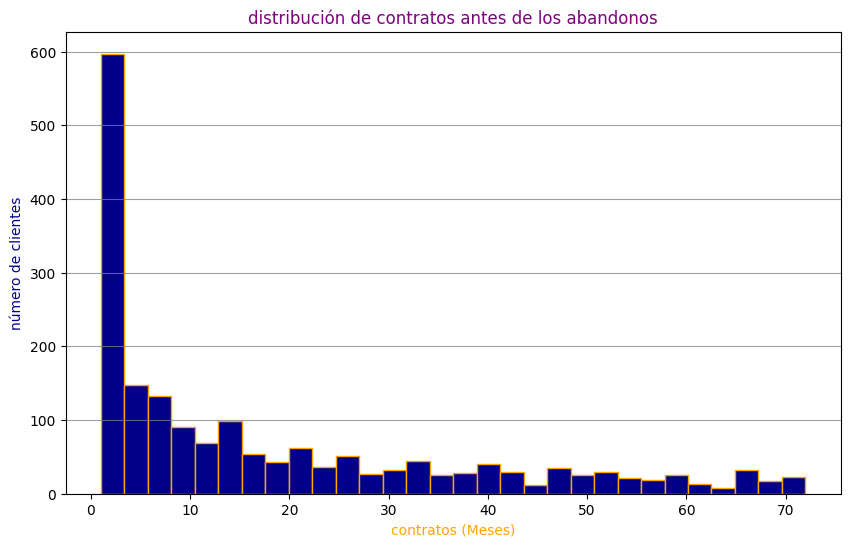

In [140]:
plt.figure(figsize=(10, 6))
plt.hist(churn_s['tenure'], bins=30, color='darkblue', edgecolor='orange')
plt.title('distribución de contratos antes de los abandonos', color= 'purple')
plt.xlabel('contratos (Meses)',color= 'orange')
plt.ylabel('número de clientes', color= 'darkblue')
plt.grid(axis='y', alpha=0.75, color= 'gray')
plt.show()

In [141]:
# Personas que han abandonaron la empresa, siendo mayores de 65.
mayors = churn_s[churn_s['SeniorCitizen'] == 1].copy()

print("Clientes que abandonaron con la empresa:")
display(mayors.head(10))
print(f"Total de clientes: {len(mayors)}")

Clientes que abandonaron con la empresa:


,customerID,gender,SeniorCitizen,tenure,Contract,PhoneService,OnlineSecurity,OnlineBackup,Charges.Total,Charges.Monthly,Daily_Charge,Churn
3,0011-IGKFF,Male,1,13,Month-to-month,Yes,No,Yes,1237.85,98.00,3.266667,Yes
4,0013-EXCHZ,Female,1,3,Month-to-month,Yes,No,No,267.40,83.90,2.796667,Yes
18,0022-TCJCI,Male,1,45,One year,Yes,Yes,No,2791.50,62.70,2.090000,Yes
19,0023-HGHWL,Male,1,1,Month-to-month,No,No,No,25.10,25.10,0.836667,Yes
41,0067-DKWBL,Male,1,2,Month-to-month,Yes,Yes,No,91.10,49.25,1.641667,Yes
55,0094-OIFMO,Female,1,11,Month-to-month,Yes,No,Yes,1120.30,95.00,3.166667,Yes
113,0193-ESZXP,Female,1,58,One year,Yes,Yes,Yes,6205.50,105.50,3.516667,Yes
116,0196-VULGZ,Female,1,6,Month-to-month,Yes,No,No,474.90,84.35,2.811667,Yes
161,0257-ZESQC,Female,1,27,Month-to-month,Yes,Yes,No,1929.35,75.20,2.506667,Yes
167,0265-EDXBD,Male,1,32,Month-to-month,Yes,No,No,2303.35,74.90,2.496667,Yes


Total de clientes: 476


In [142]:
Perdida = churn_s.groupby(['gender','SeniorCitizen'])['Charges.Total'].sum().nlargest(4).reset_index()
Perdida.columns = ['Gender', 'SeniorCitizen', 'Ventas']

In [143]:
encabezado = {
    'selector':'th',
    'props': 'font-weight:bold; font-family:Arial; text-aline:right; text-transform:capitalize; background-color:darkblue'
}

celdas = {
    'selector':'td',
    'props': ' background-color:gray'
}

Perdida.style.set_table_styles([encabezado,celdas]).format({'Ventas': '$ {:,.2f}'}).bar(subset='Ventas',color='salmon')

,Gender,SeniorCitizen,Ventas
0,Male,0,"$ 1,042,853.55"
1,Female,0,"$ 937,668.20"
2,Male,1,"$ 466,993.60"
3,Female,1,"$ 415,411.55"


#📄Informe final

# Por hacer

Se Realiza la limpieza de datos y el análisis exploratorio inicial del conjunto de datos de abandono de clientes, procedente de "https://raw.githubusercontent.com/JDVAR7/Challenge-2---TelecomX-DSLatam/refs/heads/main/TelecomX_Data.jason". Convertir la columna "Charges.Total" a un tipo de dato numérico (float), gestionando los valores no numéricos. Resumiendo los pasos de limpieza de datos, presentando la información clave derivada de las visualizaciones y ofreciendo recomendaciones para un análisis posterior.

Se Limpia y convierte 'Charges.Total'

Igual para la columna 'account_Charges.Total' pasando a ser un tipo de dato numérico (float).
La subtarea requiere suprimir la columna 'account_Charges.Total' que quedó como residuo.

In [144]:
print(df_1['Charges.Total'].dtype)
print(df_1['Charges.Total'].head())

float64
0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: Charges.Total, dtype: float64


## Visualizar la distribución de la rotación

Se Crea un gráfico de barras para visualizar la distribución de la rotación (Sí/No) y comprender la proporción de clientes que han abandonado la empresa.


Para visualizar la distribución de 'Churn', crearé un gráfico de barras usando seaborn.countplot(), estableciendo 'Churn' en el eje x, agregando un título y etiquetando los ejes según las instrucciones.



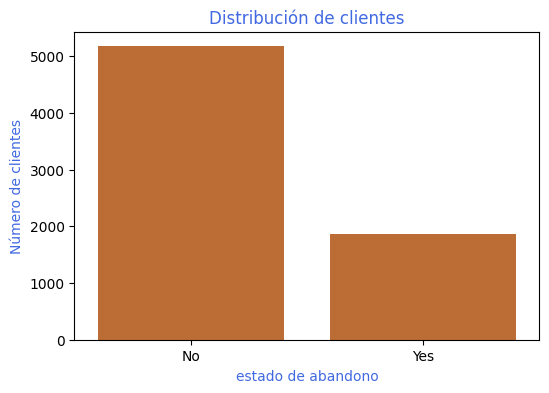

In [145]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_1, x='Churn', color= 'chocolate')
plt.title('Distribución de clientes', color= 'royalblue')
plt.xlabel('estado de abandono', color= 'royalblue')
plt.ylabel('Número de clientes', color= 'royalblue')
plt.show()

## Visualizar la tasa de abandono según el estatus de la tercera edad

Se genera un gráfico de barras para mostrar la tasa de abandono entre las personas mayores de 65 años y las que no lo son.

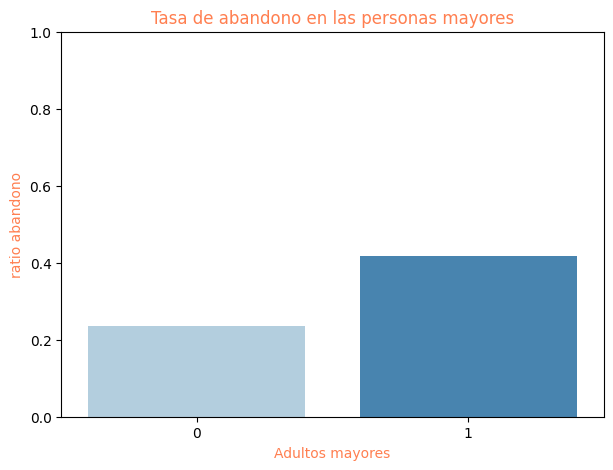

In [160]:
df_1['Churn_Numeric'] = df_1['Churn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))
churn_rate_by_seniority = df_1.groupby('SeniorCitizen')['Churn_Numeric'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=churn_rate_by_seniority, x='SeniorCitizen', y='Churn_Numeric', hue='SeniorCitizen', palette='Blues', legend=False)
plt.title('Tasa de abandono en las personas mayores', color= 'coral')
plt.xlabel('Adultos mayores', color= 'coral')
plt.ylabel('ratio abandono',color= 'coral')
plt.ylim(0, 1)
plt.show()

La ejecución anterior generó correctamente el gráfico, describiendonos un ratio significativo de personas mayores a 65 años que han abandonado la empresa, sus motivos pueden ser diversos y en relación con las realciones tecnología y acceso a las diferentes ofertas de la empresa.



In [147]:
df_1.corr(numeric_only=True)

,SeniorCitizen,tenure,Charges.Total,Charges.Monthly,Daily_Charge,Churn_Numeric
SeniorCitizen,1.000000,0.018187,0.103499,0.220388,0.220388,0.150889
tenure,0.018187,1.000000,0.825118,0.247982,0.247982,-0.352229
Charges.Total,0.103499,0.825118,1.000000,0.652109,0.652109,-0.199484
Charges.Monthly,0.220388,0.247982,0.652109,1.000000,1.000000,0.193356
Daily_Charge,0.220388,0.247982,0.652109,1.000000,1.000000,0.193356
Churn_Numeric,0.150889,-0.352229,-0.199484,0.193356,0.193356,1.000000


In [151]:
# Creamos una nueva columna 'Num_Services' contando los servicios activos
# Identificamos las columnas relacionadas con el servicio que son 'Sí'/'No' o equivalentes

service_columns = ['PhoneService', 'OnlineSecurity', 'OnlineBackup']

# Convierte 'Sí' en 1, 'No' en 0 para estas columnas
for col in service_columns:
    df_1.loc[:, col + '_Numeric'] = df_1[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Se suman las columnas para obtener 'Num_Services'
df_1['Num_Services'] = df_1[[col + '_Numeric' for col in service_columns]].sum(axis=1)

# Mostrar las primeras filas con la nueva columna
print("DataFrame con la columna 'Num_Services:")
display(df_1[['customerID', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'Num_Services', 'Daily_Charge', 'Churn']].head(10))

DataFrame con la columna 'Num_Services:


,customerID,PhoneService,OnlineSecurity,OnlineBackup,Num_Services,Daily_Charge,Churn
0,0002-ORFBO,Yes,No,Yes,2,2.186667,No
1,0003-MKNFE,Yes,No,No,1,1.996667,No
2,0004-TLHLJ,Yes,No,No,1,2.463333,Yes
3,0011-IGKFF,Yes,No,Yes,2,3.266667,Yes
4,0013-EXCHZ,Yes,No,No,1,2.796667,Yes
5,0013-MHZWF,Yes,No,No,1,2.313333,No
6,0013-SMEOE,Yes,Yes,Yes,3,3.656667,No
7,0014-BMAQU,Yes,Yes,No,2,2.821667,No
8,0015-UOCOJ,Yes,Yes,No,2,1.606667,No
9,0016-QLJIS,Yes,Yes,Yes,3,3.015000,No


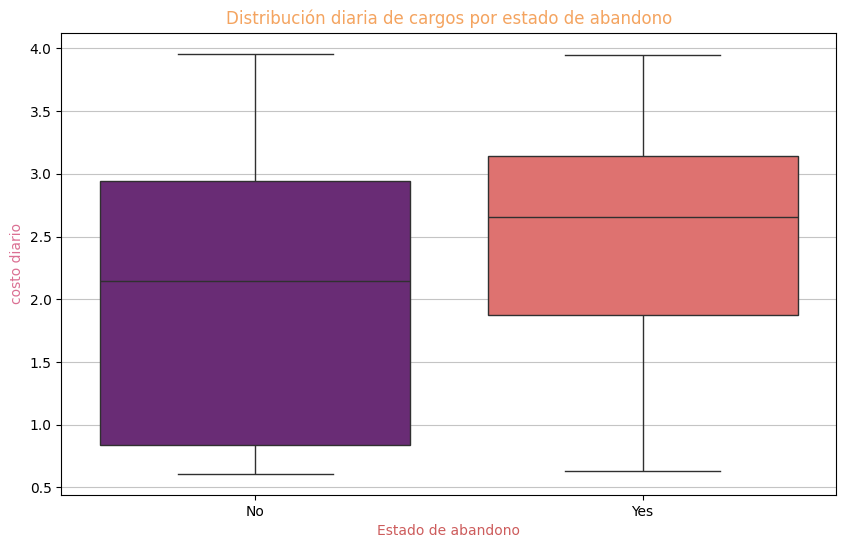

In [153]:
# Visualizamos la distribución para clientes que abandonaron y clientes que no abandonaron
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1, x='Churn', y='Daily_Charge', hue='Churn', palette='magma', legend=False)
plt.title('Distribución diaria de cargos por estado de abandono', color= 'sandybrown')
plt.xlabel('Estado de abandono', color= 'indianred')
plt.ylabel('costo diario', color= 'palevioletred')
plt.grid(axis='y', alpha=0.75)
plt.show()

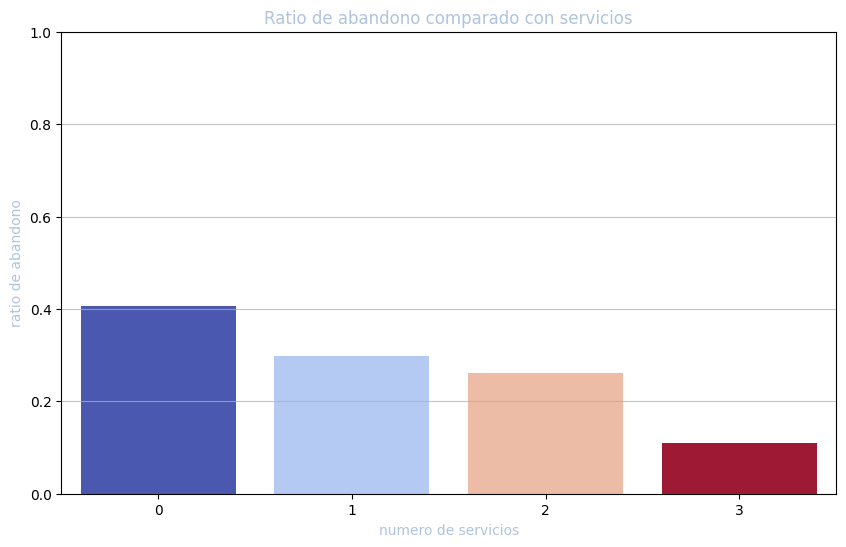

In [162]:
# Se calcula la tasa de abandono por número de servicios
if 'Churn_Numeric' not in df_1.columns:
    df_1['Churn_Numeric'] = df_1['Churn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))

churn_rate_by_services = df_1.groupby('Num_Services')['Churn_Numeric'].mean().reset_index()

# Visualizamos la tasa de abandono por número de servicios
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_rate_by_services, x='Num_Services', y='Churn_Numeric', hue='Num_Services', palette='coolwarm', legend=False)
plt.title('Ratio de abandono comparado con servicios', color= 'lightsteelblue')
plt.xlabel('numero de servicios', color= 'lightsteelblue')
plt.ylabel('ratio de abandono', color= 'lightsteelblue')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Tarea final

Se procede a Resumir los pasos de limpieza de datos realizados y presentar los hallazgos clave de las visualizaciones de abandono. Ofrecer recomendaciones para un análisis más profundo basado en los patrones observados.


## Resumen:

1. **Resuma los pasos de limpieza de datos realizados:**
La columna `Charges.Total` se convirtió a un tipo de dato numérico (`float64`), Una comprobación inicial de valores faltantes en la columna `Churn` reveló 0 valores faltantes, por lo que no se omitieron filas. La columna `SeniorCitizen` se asignó primero de sus valores numéricos originales (0 y 1) a las etiquetas `No` y `Sí` antes de la conversión.

2. **Presentando las conclusiones clave de las visualizaciones de la tasa de abandono:**
Se generó correctamente un gráfico de barras para visualizar la distribución general de la tasa de abandono de clientes (Sí/No). Se creó otro gráfico de barras para mostrar la tasa de abandono según el estado de "SeniorCitizen", lo que permite una comparación visual de las tasas de abandono entre personas mayores y no mayores.

3. **Proporcionando recomendaciones para un análisis más profundo basado en los patrones observados:**
Las recomendaciones incluyen cuantificar las tasas de abandono exactas a partir de las visualizaciones generadas, explorar el impacto de otros atributos del cliente (ej. diferencial entre hombre y mujeres, costos mensuales, anuales o diarios, tipo de contrato) en la tasa de abandono, abordar los valores introducidos en la columna "Charges.Total" y construir un modelo predictivo para la tasa de abandono de clientes.

### Hallazgos clave del análisis de datos
* La diferencia entre generos ante los abandonos de la empresa no constituyen un diferencial influyento o significativo, a efecto de dar recomendaciones o configurar un objeto de estudio.

* Sí se generaron visualizaciones que proporcionaron una comprensión inicial de la distribución general de la pérdida de clientes y cómo varían las tasas de pérdida según la condición de persona mayor.
* Tambien se idenficó la situación anterior en los contratos de las persona que abandonaron la empresa, llamando la atención que la gran mayoría sostenían contratos cortos o de pagos que correspondian a pagos por mes.

### Perspectivas o próximos pasos
* **Perspectivas:** El conjunto de datos está bien preparado para un análisis posterior gracias a la limpieza exhaustiva de datos, que incluye la conversión de tipos y la gestión de los valores faltantes en la columna "Churn". Las visualizaciones preliminares sugieren que la condición de persona mayor podría ser un factor relevante que influye en la pérdida de clientes. **Próximos pasos:** Cuantifique las tasas de abandono que se muestran en las visualizaciones para obtener información numérica específica, como el porcentaje exacto de abandono y las tasas de abandono de personas mayores en comparación con las que no lo son. Se debe realizar un análisis exploratorio de datos adicional para investigar el impacto de otras características en el abandono y determinar la mejor estrategia para gestionar los valores en la columna «Charges.Total».


## Datos:

### Hallazgos clave del análisis de datos
* Los nombres de las columnas en el DataFrame `df_1` se simplificaron correctamente eliminando los prefijos 'customer\_', 'phone\_', 'internet\_' y 'account\_'.
* Esta operación de renombramiento mejoró la legibilidad e interpretación del conjunto de datos, facilitando la comprensión de las características representadas por cada columna.

### Perspectivas o próximos pasos
* La limpieza de los nombres de las columnas mejora la claridad de los datos, lo que facilitará un análisis posterior más eficiente y preciso, así como la construcción de modelos.
* Continúe con el análisis exploratorio de datos o la ingeniería de características utilizando los nombres de columna ahora simplificados y más comprensibles.
